[View in Colaboratory](https://colab.research.google.com/github/RXV06021/basicPy/blob/master/basicSeaborn.ipynb)

# Seaborn - pythonで美しいグラフ描画

　－　seabornを使えばデータ分析と可視化が捗る

http://seaborn.pydata.org/index.html#  
https://qiita.com/hik0107/items/3dc541158fceb3156ee0  
https://qiita.com/hik0107/items/7233ca334b2a5e1ca924

**matplotlibとseaborn**

**matplotlib：**  
できることが多くていいけど、扱うのが複雑で面倒

**seaborn：**  
matplotlibをベースにしているけど、もっと見目麗しく、簡単にかけるから最高！

## セッティング

In [2]:
!pip install seaborn

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns

x = np.random.normal(size=100)        #ランダムデータをnumpy arrayとして作る

titanic = sns.load_dataset("titanic") ## kaggleで有名な、タイタニック号の生死者データ
tips = sns.load_dataset("tips")       ## お店の食事時間と会計総額とチップの関係のデータ
iris = sns.load_dataset("iris")       ## Rでお馴染みのアヤメの統計データ

# 1．Style management

## （１）Controlling figure aesthetics

Drawing attractive figures is important. When making figures for yourself, as you explore a dataset, it’s nice to have plots that are pleasant to look at. Visualizations are also central to communicating quantitative insights to an audience, and in that setting it’s even more necessary to have figures that catch the attention and draw a viewer in.

Matplotlib is highly customizable, but it can be hard to know what settings to tweak to achieve an attractive plot. Seaborn comes with a number of customized themes and a high-level interface for controlling the look of matplotlib figures.

In [0]:
%matplotlib inline

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(sum(map(ord, "aesthetics")))

Let’s define a simple function to plot some offset sine waves, which will help us see the different stylistic parameters we can tweak.

In [0]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

This is what the plot looks like with <font color="red">**matplotlib**</font> defaults:

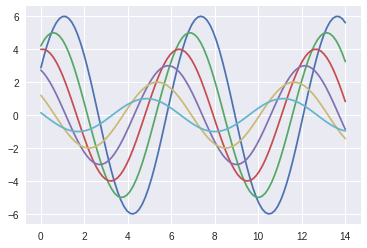

In [6]:
sinplot()

To switch to  <font color="red">**seaborn**</font>  defaults, simply call the  <font color="red">**set()**</font>  function.

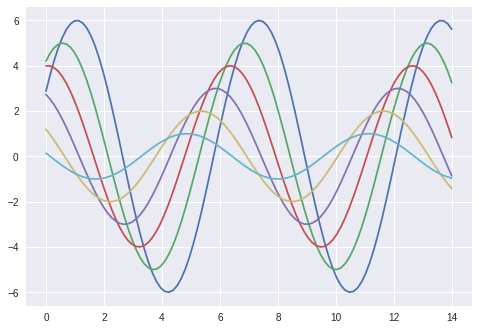

In [7]:
sns.set()
sinplot()

(Note that in versions of <font color="red">**seaborn**</font> prior to 0.8, [set](http://seaborn.pydata.org/generated/seaborn.set.html#seaborn.set)() was called on import. On later versions, it must be explicitly invoked).

<font color="red">**Seaborn**</font> splits <font color="red">**matplotlib**</font> parameters into two independent groups. The first group sets the aesthetic style of the plot, and the second scales various elements of the figure so that it can be easily incorporated into different contexts.

The interface for manipulating these parameters are two pairs of functions. To control the style, use the [axes_style](http://seaborn.pydata.org/generated/seaborn.axes_style.html#seaborn.axes_style)() and [set_style](http://seaborn.pydata.org/generated/seaborn.set_style.html#seaborn.set_style)() functions. To scale the plot, use the [plotting_context](http://seaborn.pydata.org/generated/seaborn.plotting_context.html#seaborn.plotting_context)() and [set_context](http://seaborn.pydata.org/generated/seaborn.set_context.html#seaborn.set_context)() functions. In both cases, the first function returns a dictionary of parameters and the second sets the <font color="red">**matplotlib**</font> defaults.

### ① Seaborn figure styles

There are five preset <font color="red">**seaborn**</font> themes: **darkgrid**, **whitegrid**, **dark**, **white**, and **ticks**. They are each suited to different applications and personal preferences. The default theme is darkgrid. As mentioned above, the grid helps the plot serve as a lookup table for quantitative information, and the white-on grey helps to keep the grid from competing with lines that represent data. The whitegrid theme is similar, but it is better suited to plots with heavy data elements:

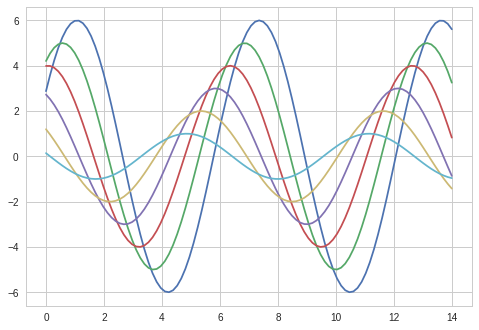

In [8]:
sns.set_style("whitegrid")
sinplot()

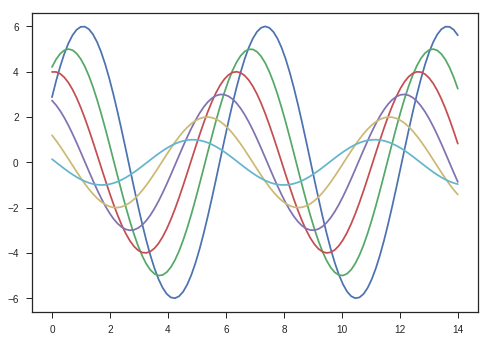

In [9]:
sns.set_style("ticks")
sinplot()

### ② Removing axes spines
Both the **white** and **ticks** styles can benefit from removing the top and right axes spines, which are not needed. It’s impossible to do this through the <font color="red">**matplotlib**</font> parameters, but you can call the <font color="red">**seaborn**</font> function [despine](http://seaborn.pydata.org/generated/seaborn.despine.html#seaborn.despine)() to remove them:

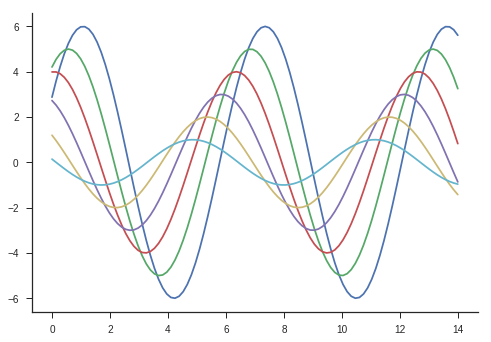

In [10]:
sinplot()
sns.despine()

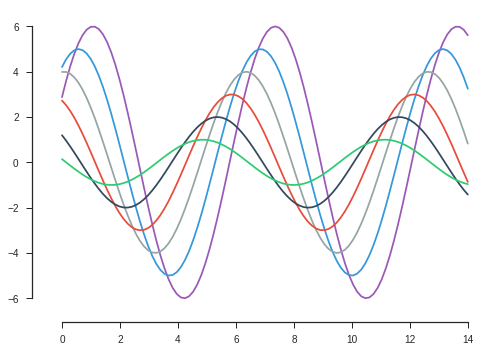

In [21]:
sinplot()
sns.despine(offset=10, trim=True);

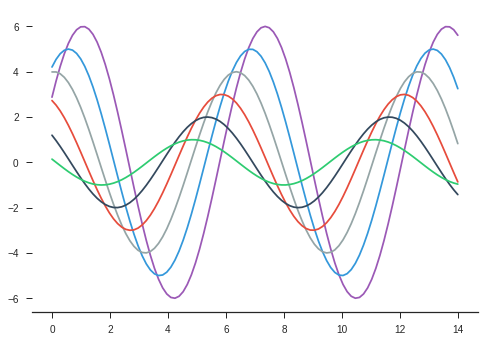

In [22]:
sinplot()
sns.despine(left=True)

### ③ Temporarily setting figure style

Although it’s easy to switch back and forth, you can also use the [axes_style](http://seaborn.pydata.org/generated/seaborn.axes_style.html#seaborn.axes_style)() function in a with statement to temporarily set plot parameters. This also allows you to make figures with differently-styled axes:

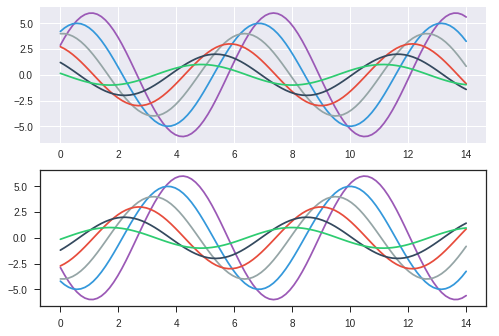

In [23]:
with sns.axes_style("darkgrid"):
    plt.subplot(211)
    sinplot()
plt.subplot(212)
sinplot(-1)

### ④ Overriding elements of the seaborn styles

If you want to customize the  <font color="red">**seaborn**</font> styles, you can pass a dictionary of parameters to the rc argument of [axes_style](http://seaborn.pydata.org/generated/seaborn.axes_style.html#seaborn.axes_style)() and [set_style](http://seaborn.pydata.org/generated/seaborn.set_style.html#seaborn.set_style)(). Note that you can only override the parameters that are part of the style definition through this method. (However, the higher-level [set](http://seaborn.pydata.org/generated/seaborn.set.html#seaborn.set)() function takes a dictionary of any  <font color="red">**matplotlib**</font> parameters).

If you want to see what parameters are included, you can just call the function with no arguments, which will return the current settings:

In [24]:
sns.axes_style()

{'axes.axisbelow': True,
 'axes.edgecolor': '.15',
 'axes.facecolor': 'white',
 'axes.grid': False,
 'axes.labelcolor': '.15',
 'axes.linewidth': 1.25,
 'figure.facecolor': 'white',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'grid.color': '.8',
 'grid.linestyle': '-',
 'image.cmap': 'Greys',
 'legend.frameon': False,
 'legend.numpoints': 1,
 'legend.scatterpoints': 1,
 'lines.solid_capstyle': 'round',
 'text.color': '.15',
 'xtick.color': '.15',
 'xtick.direction': 'out',
 'xtick.major.size': 6.0,
 'xtick.minor.size': 3.0,
 'ytick.color': '.15',
 'ytick.direction': 'out',
 'ytick.major.size': 6.0,
 'ytick.minor.size': 3.0}

You can then set different versions of these parameters:

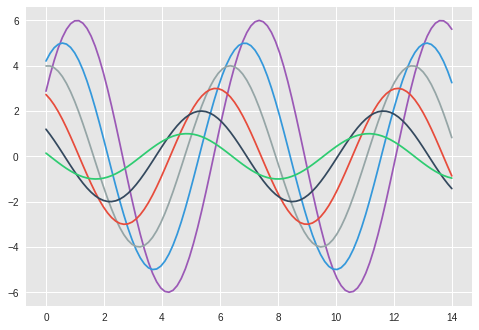

In [25]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sinplot()

### ⑤ Scaling plot elements

A separate set of parameters control the scale of plot elements, which should let you use the same code to make plots that are suited for use in settings where larger or smaller plots are appropriate.

First let’s reset the default parameters by calling [set](http://seaborn.pydata.org/generated/seaborn.set.html#seaborn.set)():

In [0]:
sns.set()

The four preset contexts, in order of relative size, are paper, notebook, talk, and poster. The notebook style is the default, and was used in the plots above.

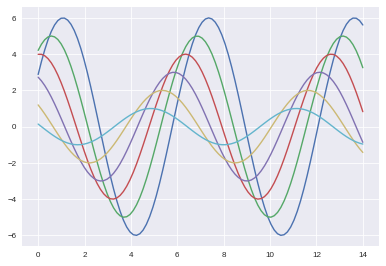

In [27]:
sns.set_context("paper")
sinplot()

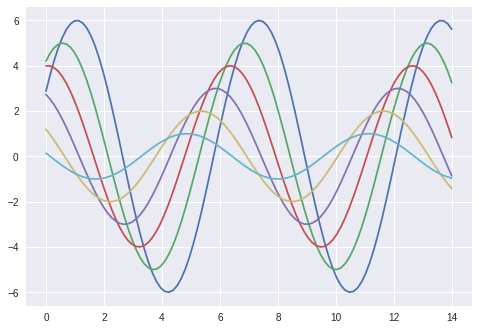

In [30]:
sns.set_context("notebook")
sinplot()

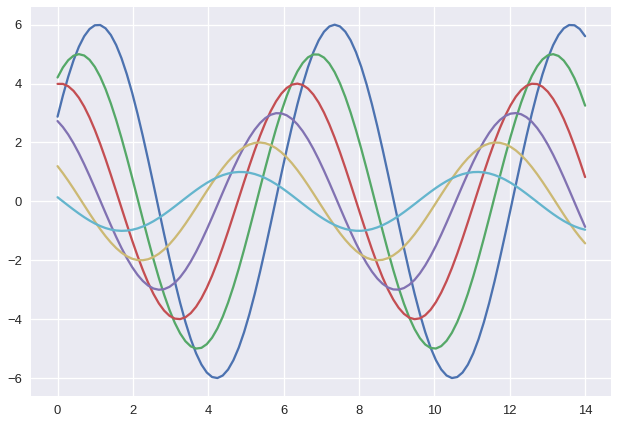

In [28]:
sns.set_context("talk")
sinplot()

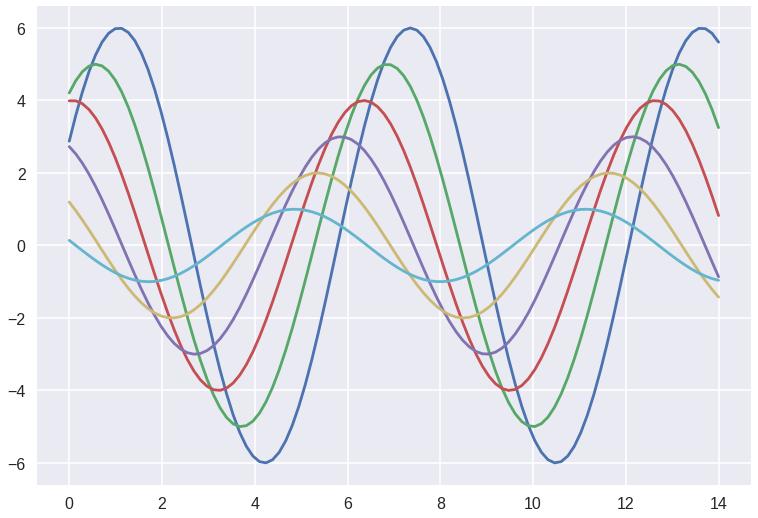

In [29]:
sns.set_context("poster")
sinplot()

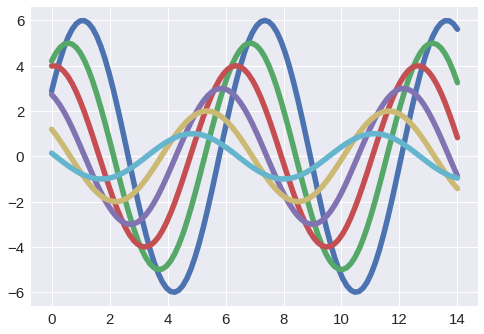

In [34]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 5.5})
sinplot()

## （２）Choosing color palettes

Color is more important than other aspects of figure style because color can reveal patterns in the data if used effectively or hide those patterns if used poorly. There are a number of great resources to learn about good techniques for using color in visualizations, I am partial to this [series of blog posts](http://earthobservatory.nasa.gov/blogs/elegantfigures/2013/08/05/subtleties-of-color-part-1-of-6/) from Rob Simmon and this [more technical paper](https://cfwebprod.sandia.gov/cfdocs/CompResearch/docs/ColorMapsExpanded.pdf). The <font color="red">**matplotlib**</font> docs also now have a [nice tutorial](http://matplotlib.org/users/colormaps.html) that illustrates some of the perceptual properties of the built in colormaps.

<font color="red">**Seaborn**</font> makes it easy to select and use color palettes that are suited to the kind of data you are working with and the goals you have in visualizing it.

In [0]:
%matplotlib inline

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={"figure.figsize": (6, 6)})
np.random.seed(sum(map(ord, "palettes")))

# 2．Plotting functions

## （１）Visualizing the distribution of a dataset

When dealing with a set of data, often the first thing you’ll want to do is get a sense for how the variables are distributed. This chapter of the tutorial will give a brief introduction to some of the tools in <font color="red">**seaborn**</font> for examining univariate and bivariate distributions. You may also want to look at the [categorical plots](http://seaborn.pydata.org/tutorial/categorical.html#categorical-tutorial) chapter for examples of functions that make it easy to compare the distribution of a variable across levels of other variables.

In [0]:
%matplotlib inline

import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(color_codes=True)

np.random.seed(sum(map(ord, "distributions")))

### ① Plotting univariate distributions

The most convenient way to take a quick look at a univariate distribution in <font color="red">**seaborn**</font> is the [distplot](http://seaborn.pydata.org/generated/seaborn.distplot.html#seaborn.distplot)() function. By default, this will draw a [histogram](https://en.wikipedia.org/wiki/Histogram) and fit a [kernel density estimate](https://en.wikipedia.org/wiki/Kernel_density_estimation) (KDE).

Seabornではヒストグラムは「distplot」というメソッドで描画できます。

kdeは密度近似関数の描画のオプション、binsはx軸の刻み目の指定です。  
rugに関してはTrueにすると何が起こるか試してみてください。

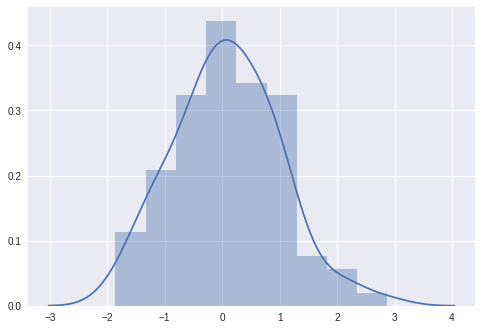

In [37]:
x = np.random.normal(size=100)
sns.distplot(x);

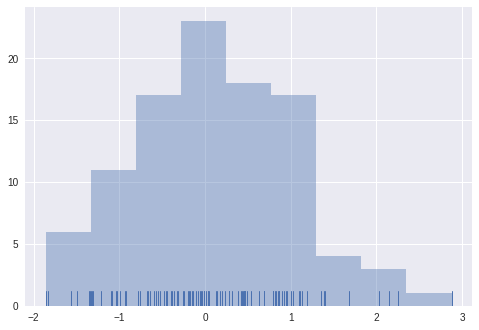

In [41]:
sns.distplot(x, kde=False, rug=True);

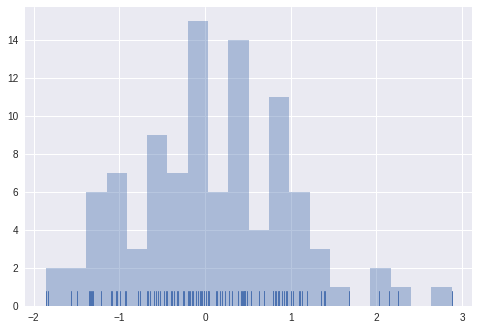

In [42]:
sns.distplot(x, bins=20, kde=False, rug=True);

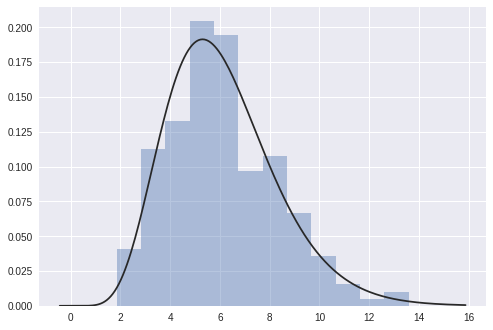

In [45]:
x = np.random.gamma(6, size=200)
sns.distplot(x, kde=False, fit=stats.gamma);

### ② Plotting bivariate distributions

It can also be useful to visualize a bivariate distribution of two variables. The easiest way to do this in <font color="red">**seaborn**</font> is to just use the [jointplot](http://seaborn.pydata.org/generated/seaborn.jointplot.html#seaborn.jointplot)() function, which creates a multi-panel figure that shows both the bivariate (or joint) relationship between two variables along with the univariate (or marginal) distribution of each on separate axes.

The most familiar way to visualize a bivariate distribution is a **scatterplot,** where each observation is shown with point at the x and y values. This is analgous to a rug plot on two dimensions. You can draw a scatterplot with the <font color="red">**matplotlib**</font>  <font color="blue">**plt.scatter**</font>  function, and it is also the default kind of plot shown by the [jointplot](http://seaborn.pydata.org/generated/seaborn.jointplot.html#seaborn.jointplot)() function:

pearsonr：ピアソンの相関係数  
p：p値

In [0]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])

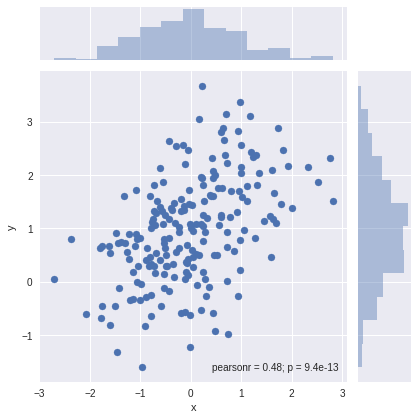

In [47]:
sns.jointplot(x="x", y="y", data=df);

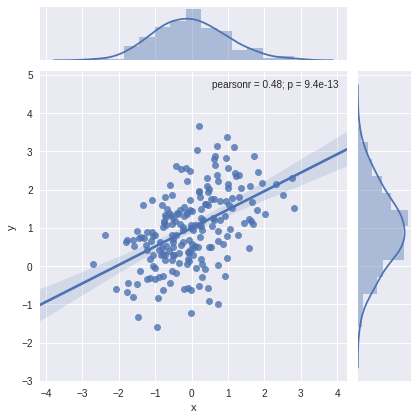

In [49]:
sns.jointplot("x", "y", data=df, kind="reg");

### ③ Visualizing pairwise relationships in a dataset

To plot multiple pairwise bivariate distributions in a dataset, you can use the [pairplot](http://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot)() function. This creates a matrix of axes and shows the relationship for each pair of columns in a DataFrame. by default, it also draws the univariate distribution of each variable on the diagonal Axes:

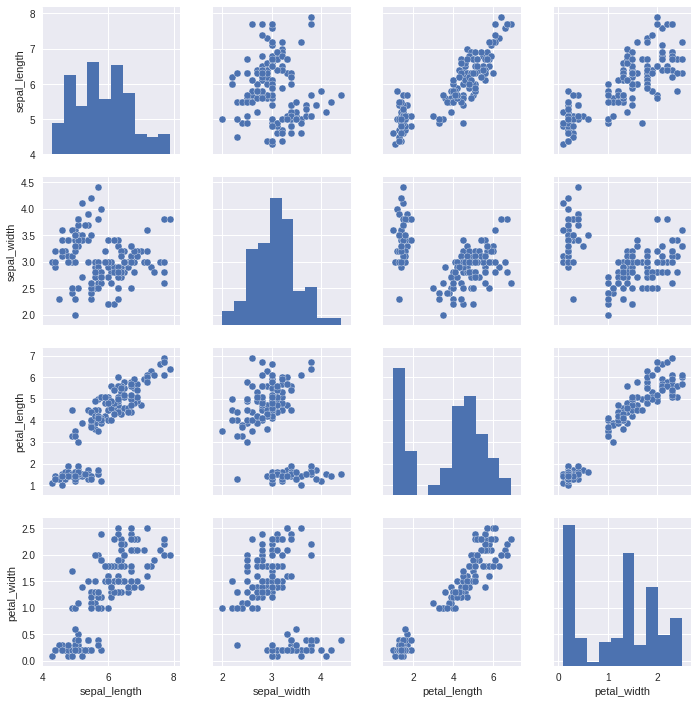

In [50]:
iris = sns.load_dataset("iris")
sns.pairplot(iris);

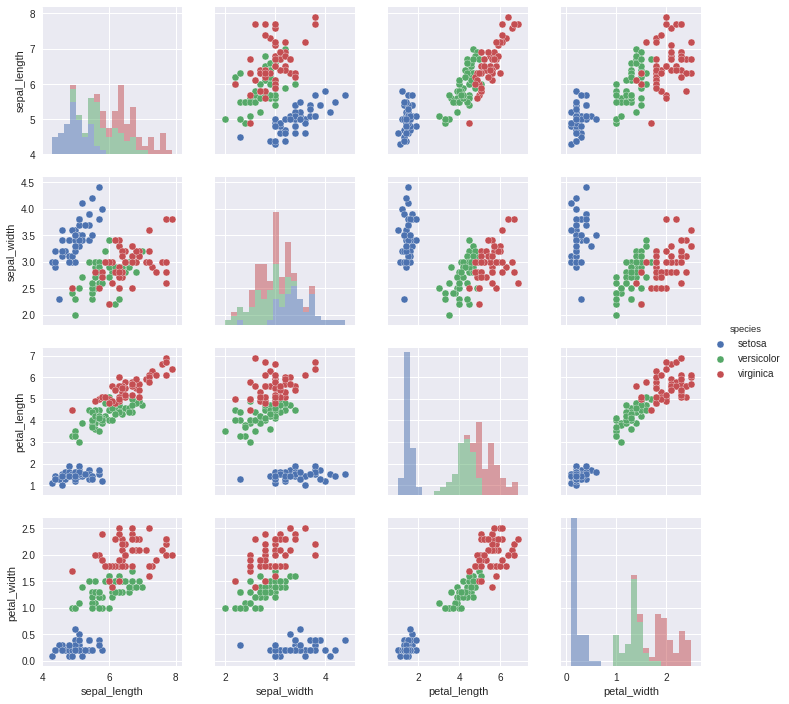

In [60]:
sns.pairplot(iris, hue='species',
             plot_kws={'alpha': 1},
             diag_kws={'alpha': 0.5, 'bins': 20});

## （２）Plotting with categorical data

## （３）Visualizing linear relationships

## 分布プロット

<font color="red">**stripplot**</font>   
ここではtipデータを使ってみます。  
曜日ごとに、お客さんの会計（total_bill）がどう分布しているかを見てみましょう。  
stripplotというメソッドを使います。

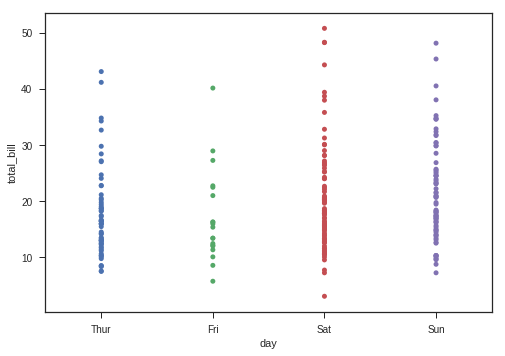

In [16]:
sns.stripplot(x="day", y="total_bill", data=tips)

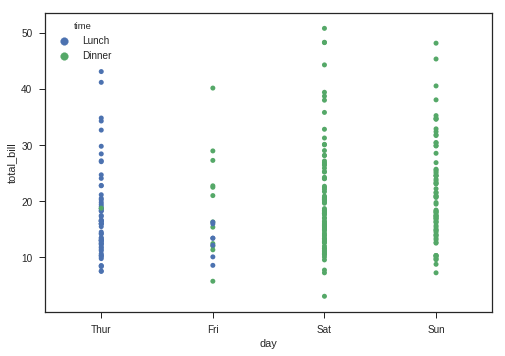

In [17]:
sns.stripplot(x="day", y="total_bill", data=tips, hue='time')

In [18]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


## 箱ひげプロット

<font color="red">**boxplot**</font>   
boxplotというメソッドを使います。

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


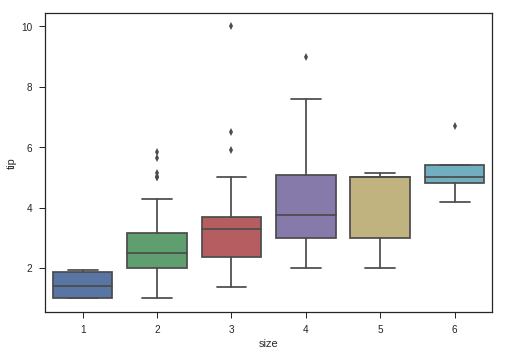

In [19]:
sns.boxplot(x="size", y="tip", data=tips)

**カラーパレット**

http://stanford.edu/~mwaskom/software/seaborn/tutorial/color_palettes.html

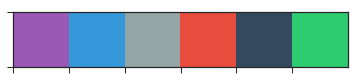

In [20]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]

sns.palplot(sns.color_palette(flatui))
sns.set_palette(flatui)